Reading in data and data preparations:

In [2]:
import pandas as pd

df = pd.read_csv("final_report_values.csv")

/var/folders/6w/7bbpdns15f3_lz9dcrprnwm80000gn/T/ipykernel_1229/678992568.py:3: DtypeWarning: Columns (6,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_report_values.csv")


In [3]:
cvefixes = pd.read_csv('data/cvefixes_new.csv', sep= ";", names=['cve', 'commit', 'repo', 'file', 'date1', 'date2'])

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.columns

Index(['CVE', 'ProjectUrl', 'Project', 'Path', 'status', 'FirstBadBlob',
       'FirstBadTime', 'FirstGoodBlob', 'FirstGoodTime', 'TimeSinceFix',
       'TimeSinceFixF', 'TimeSincePub', 'TimeSincePubF', 'TimeVulnRemained',
       'TimeVulnRemainedF', 'NumAuthors', 'EarliestCommitDate',
       'LatestCommitDate', 'ValidDates', 'NumActiveMon', 'NumStars', 'NumCore',
       'CommunitySize', 'NumCommits', 'NumForks', 'FileInfo', 'GHStars',
       'GHCommits', 'SECURITY.md', 'Corp'],
      dtype='object')

In [6]:
df.head()

,CVE,ProjectUrl,Project,Path,status,FirstBadBlob,FirstBadTime,FirstGoodBlob,FirstGoodTime,TimeSinceFix,...,NumStars,NumCore,CommunitySize,NumCommits,NumForks,FileInfo,GHStars,GHCommits,SECURITY.md,Corp
0,CVE-2010-2809,github.com/uzbl/uzbl,uzbl_uzbl,,fixed,9dd1370d0b7cd876f004f7a822b0357039252184,1262459475,9cc39cb5c9396be013b5dc2ba7e4b3eaa647e975,1281006747,0,...,988,9,230,7375,221,Lisp,971,4565,No,No
1,CVE-2010-3260,github.com/Dariucc07/Predicting-Vulnerable-Code,Dariucc07_Predicting-Vulnerable-Code,Dataset2/mining_results/RepositoryMining12/59...,notfixed,2e7f17890a24122e43a86e1185a16a2dbedf986f,1590856260,,,,...,2,2,1,47,0,Java,1,47,No,No
2,CVE-2010-1630,github.com/phpbb/phpbb,phpbb_phpbb,,fixed,33520bbf5bd80414f0cad5b7644a60ef05e20e43,982399052,1758aa38b21f5960ab1b1a241546b34a203051b6,1241079332,0,...,2341,31,1301,113558,1420,PHP,1584,36455,No,No
3,CVE-2010-1630,github.com/steveh/phpbb,steveh_phpbb,,fixed,a07aa9fb69439b7306dc2803695ca1a693cfe492,982399052,77e524e1bdcdf76d141c23ee7682ea3304022282,1241079332,0,...,,7,2,18255,0,PHP,,,No,No
4,CVE-2011-1588,github.com/simula67/Thunar-1.3.0,simula67_Thunar-1.3.0,thunar/thunar-transfer-job.c,notfixed,699184df2d3fdc86c365af02ae652f3898e931a3,1348235432,,,,...,,1,1,2,0,C/C++,0,2,No,No


## RQ1: How prevalent are cloned files with vulnerabilities?

Subquestions: 

- How many vulnerabilities are cloned in total? 
- What percentage of vulnerabilities in CVEFixes dataset have been cloned? 
- How many projects are there with cloned vulnerabilities?
- How many clones of vulnerabilities are there in total? 

In [7]:
# How many vulnerabilities are cloned in total? 

df['CVE'].nunique()

3093

In [8]:
# What percentage of vulnerabilities in CVEFixes dataset have been cloned?

df['CVE'].nunique() / cvefixes['cve'].nunique() * 100.0

85.56016597510373

In [9]:
# How many projects are there with cloned vulnerabilities?

df['Project'].nunique()

499101

In [10]:
df['CVE'].count()

2686265

## RQ2: What are the characteristics of projects that have cloned vulnerabilities?

Subquestions: 
- Number of commits? 
- Number of contributors? 
- Number of stars? 
- Language of the project? 
- File ending of the vulnerable file? 
- Security.md file?

In [11]:
df['file_ending'] = df.Path.str.split('.').str[-1]

In [12]:
# number of copies for each file_ending

df['file_ending'].value_counts().sort_values(ascending=False)[0:20]

c                        1956517
js                        397028
php                       199412
cc                         34839
h                          29370
py                         17726
rb                         15733
json                       13996
cpp                         4025
svn-base                    3489
 drivers/char/Kconfig       1797
go                          1791
pm                          1294
zsh                         1250
htm                         1196
java                         987
S                            776
cs                           375
swift                        351
lua                          236
Name: file_ending, dtype: int64

In [13]:
# number of projects that have copied at least one vulnerability for each file ending

df.groupby(['file_ending'])["Project"].nunique().sort_values(ascending=False)[0:20] 

file_ending
js                       280797
php                      116912
c                         71756
h                         15670
py                        13548
json                      13010
rb                        11771
cpp                        2858
 drivers/char/Kconfig      1797
go                         1331
pm                         1271
zsh                        1250
htm                        1040
svn-base                    834
java                        817
cc                          608
S                           464
cs                          370
swift                       202
lua                         190
Name: Project, dtype: int64

In [14]:
df.columns

Index(['CVE', 'ProjectUrl', 'Project', 'Path', 'status', 'FirstBadBlob',
       'FirstBadTime', 'FirstGoodBlob', 'FirstGoodTime', 'TimeSinceFix',
       'TimeSinceFixF', 'TimeSincePub', 'TimeSincePubF', 'TimeVulnRemained',
       'TimeVulnRemainedF', 'NumAuthors', 'EarliestCommitDate',
       'LatestCommitDate', 'ValidDates', 'NumActiveMon', 'NumStars', 'NumCore',
       'CommunitySize', 'NumCommits', 'NumForks', 'FileInfo', 'GHStars',
       'GHCommits', 'SECURITY.md', 'Corp', 'file_ending'],
      dtype='object')

In [15]:
# number of copies for each project language

df['FileInfo'].value_counts().sort_values(ascending=False)[0:20]

 C/C++         2002188
 JavaScript     449970
 PHP            181175
 Python          22982
 Ruby            15886
                  4338
 Java             3598
 Go               2132
 Perl             1330
 Swift            1170
 Sql               472
 TypeScript        249
 Lua               204
 Rust              197
 Fortran           138
 Lisp              107
 Kotlin             41
 fml                28
 Scala              15
 Basic              11
Name: FileInfo, dtype: int64

In [16]:
# number of projects that have copied at least one vulnerability for each project language


df.groupby(['FileInfo'])["Project"].nunique().sort_values(ascending=False)

FileInfo
 JavaScript    293684
 PHP           107518
 C/C++          64429
 Python         15339
 Ruby           11481
 Java            1755
 Go              1430
 Perl            1058
                  705
 Swift            585
 Sql              339
 TypeScript       193
 Lua              150
 Rust             142
 Fortran          115
 Lisp              95
 fml               23
 Kotlin            17
 R                  9
 Scala              9
 Erlang             6
 Basic              6
 Dart               5
 Julia              3
 Clojure            3
 Ada                2
Name: Project, dtype: int64

In [17]:
df['source'] = df.ProjectUrl.str.split('/').str[0]

In [18]:
df.groupby('source')['Project'].nunique()

source
 github.com    491873
 gitlab.com      7228
Name: Project, dtype: int64

In [19]:
pd.to_numeric(df[df['CommunitySize'] != " "]['CommunitySize']).describe().round(1)

count    2685924.0
mean          68.2
std         2339.9
min            1.0
25%            1.0
50%            1.0
75%            2.0
max       276770.0
Name: CommunitySize, dtype: float64

In [20]:
# number of commits --> most projects have very few commits, makes sense to filter out projects with f.ex. less than 100 commits

pd.to_numeric(df[df['NumCommits'] != " "]['NumCommits']).describe().round(1)

count     2671428.0
mean        13495.6
std        645622.2
min             1.0
25%             2.0
50%             7.0
75%            27.0
max      36468389.0
Name: NumCommits, dtype: float64

In [21]:
pd.to_numeric(df[df['NumForks'] != " "]['NumForks']).describe().round(1)

count    2685924.0
mean         105.5
std         4332.1
min            0.0
25%            0.0
50%            0.0
75%            1.0
max       345262.0
Name: NumForks, dtype: float64

In [22]:
# number of github stars --> most projects are probably toy projects. Most projects have no stars

pd.to_numeric(df[df['GHStars'] != " "]['GHStars']).describe().round(1)

count    2590621.0
mean          29.7
std         1615.5
min            0.0
25%            0.0
50%            0.0
75%            0.0
max       357521.0
Name: GHStars, dtype: float64

In [23]:
# number of github commits --> most projects have few commits, makes sense to filter out projects with less than f.ex. 100 commits

pd.to_numeric(df[df['GHCommits'] != " "]['GHCommits']).describe().round(1)

count     915352.0
mean        2080.2
std        33570.9
min            1.0
25%            2.0
50%            5.0
75%           22.0
max      1196827.0
Name: GHCommits, dtype: float64

In [31]:
# when we filter out all copies where projects have less than 100 commits, then 9.5% of rows remain

(pd.to_numeric(df[df['GHCommits'] != " "]['GHCommits']) >= 100).value_counts(normalize = True)

False    0.905085
True     0.094915
Name: GHCommits, dtype: float64

In [33]:
# most projects do not have a SECURITY.md file

df['SECURITY.md'].value_counts(normalize = True)

 No     0.971766
 Yes    0.028234
Name: SECURITY.md, dtype: float64

In [34]:
# None of the projects belongs to a corporation

df['Corp'].value_counts(normalize = True)

 No    1.0
Name: Corp, dtype: float64

## RQ3: What percentage of cloned vulnerabilities are fixed?

Subquestions: 
- How many vulnerabilities are fixed/not fixed/unknown

In [46]:
# in total 93.5% of cloned vulnerabilities are not fixed, only 3.8% of cloned vulnerabilities are fixed

df['status'].value_counts(normalize=True)

 notfixed    0.935998
 fixed       0.038415
 unknown     0.025586
Name: status, dtype: float64

## RQ4: How do different characteristics of a project affect the percentage of fixed vulnerabilities? 
_(would it be ok to modify the question like this?)_

Subquestions: 
- Number of commits? 
- Number of contributions? 
- Number of stars? 
- Language of the project? 
- File ending of the vulnerable file? 
- Security.md file?

#### Looking at the language of a project and language of the fixed file

In [71]:
project_lang = df.groupby('FileInfo')['Project'].count().sort_values(ascending=False)[0:15].reset_index()['FileInfo'].tolist()
project_lang

[' C/C++',
 ' JavaScript',
 ' PHP',
 ' Python',
 ' Ruby',
 ' ',
 ' Java',
 ' Go',
 ' Perl',
 ' Swift',
 ' Sql',
 ' TypeScript',
 ' Lua',
 ' Rust',
 ' Fortran']

In [70]:
# percentage of fixed, notfixed and unknown for all 15 most used project languages, for most over 90% of copies not fixed
# highest number for fixed vulnerabilities for Rust (36.5%)

df[df['FileInfo'].isin(project_lang)].groupby('FileInfo')['status'].value_counts(normalize=True).round(3)*100

FileInfo     status   
              notfixed    98.7
              fixed        0.7
              unknown      0.5
 C/C++        notfixed    92.9
              fixed        4.1
              unknown      3.0
 Fortran      notfixed    96.4
              fixed        2.9
              unknown      0.7
 Go           notfixed    79.2
              fixed       17.3
              unknown      3.5
 Java         notfixed    95.6
              fixed        3.1
              unknown      1.3
 JavaScript   notfixed    96.6
              fixed        2.9
              unknown      0.6
 Lua          notfixed    83.3
              fixed        9.8
              unknown      6.9
 PHP          notfixed    95.2
              fixed        2.6
              unknown      2.2
 Perl         notfixed    95.3
              fixed        3.4
              unknown      1.3
 Python       notfixed    89.7
              fixed        9.4
              unknown      0.8
 Ruby         notfixed    83.0
              un

In [78]:
file_endings = df.groupby('file_ending')['Project'].count().sort_values(ascending=False)[0:15].reset_index()['file_ending'].tolist()
file_endings

['c',
 'js',
 'php',
 'cc',
 'h',
 'py',
 'rb',
 'json',
 'cpp',
 'svn-base',
 ' drivers/char/Kconfig',
 'go',
 'pm',
 'zsh',
 'htm']

In [80]:
# percentage of fixed, notfixed and unknown for 15 most used file endings, for most over 90% of copies not fixed
# highest number of fixed vulnerabilities for go and python

df[df.file_ending.isin(file_endings)].groupby('file_ending')['status'].value_counts(normalize=True).round(3)*100

file_ending            status   
 drivers/char/Kconfig   notfixed    90.0
                        unknown      8.1
                        fixed        1.9
c                       notfixed    92.9
                        fixed        4.1
                        unknown      3.0
cc                      notfixed    99.0
                        unknown      0.8
                        fixed        0.2
cpp                     notfixed    95.1
                        fixed        3.2
                        unknown      1.7
go                      notfixed    76.9
                        fixed       19.1
                        unknown      4.0
h                       notfixed    88.6
                        fixed        9.6
                        unknown      1.7
htm                     notfixed    94.8
                        fixed        4.3
                        unknown      0.9
js                      notfixed    97.0
                        fixed        2.8
                        

In [82]:
# from above it was interesting, that Rust was among the 15 most used project languages, but not the 15 most used file extensions
# it seems that the vulnerabilities in Rust projects seem to mostly stem from other languages

df[df['FileInfo'] == ' Rust'].file_ending.value_counts()

js      78
c       68
rs      25
zsh     12
h        7
py       2
pm       2
ini      1
txt      1
test     1
Name: file_ending, dtype: int64

#### Looking at the security file

--> there does not seem to be a difference based on if a project has the Security file or not

In [86]:
df.groupby('SECURITY.md')['status'].value_counts(normalize=True).round(3)*100

SECURITY.md  status   
 No           notfixed    93.6
              fixed        3.8
              unknown      2.6
 Yes          notfixed    92.6
              fixed        4.9
              unknown      2.5
Name: status, dtype: float64

In [87]:
df.groupby('status')['SECURITY.md'].value_counts(normalize=True).round(3)*100

status     SECURITY.md
 fixed      No            96.4
            Yes            3.6
 notfixed   No            97.2
            Yes            2.8
 unknown    No            97.2
            Yes            2.8
Name: SECURITY.md, dtype: float64

#### Looking at other metrics such as: number of commits, stars, community size

Method: plot percentage of fixed, notfixed and unkown status over the increasing value of each metric. The end value for x is chosen by finding out the 99% percentile value

In [90]:
def plotByValueIncreasing(key, step, data, limit, numeric = False):
    values_fixed = []
    values_notfixed = []
    values_unknown = []
    index = []
    
    upper = step
    lower = 0
    
    if numeric == False:
        data = data[(data[key].str.strip().str.isnumeric() == True)]
        
    data = data[~(pd.isna(data[key]))]
    
    while(data[(data[key].astype("int") > lower)][key].count() > 0):
        subset = data[(data[key].astype("int") > lower) & (data[key].astype("int") < upper)]
        
        count = subset[key].count()
        values_fixed.append(subset[subset['status'] == "fixed"][key].count() / count)
        values_notfixed.append(subset[subset['status'] == "notfixed"][key].count() / count)
        values_unknown.append(subset[subset['status'] == "unknown"][key].count() / count)
        index.append(lower)
        
        upper = upper + step
        lower = lower + step
        
        if lower > limit:
            break
        
    results = pd.DataFrame({'Fixed': values_fixed, 'Not fixed': values_notfixed, 'Unknown': values_unknown, key: index})
    results.set_index(key)
    results.plot(x=key)

In [95]:
df.status = df.status.str.strip()

In [124]:
pd.to_numeric(df[df['NumCommits'] != " "]['NumCommits']).quantile(0.99)

3586.4599999999627

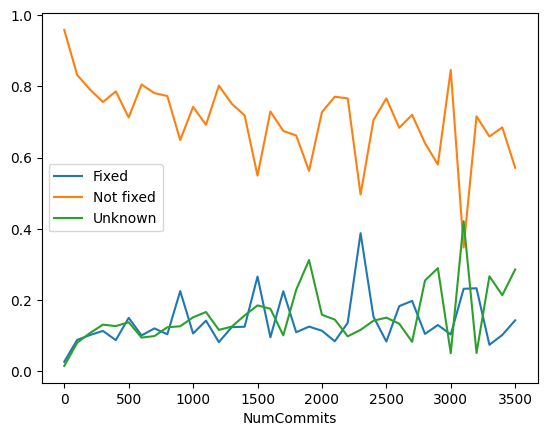

In [125]:
# projects with more commits are more likely to modify the copied vulnerability (i.e. status unknown)

plotByValueIncreasing("NumCommits", 100, df, 3586)

In [126]:
pd.to_numeric(df[df['NumActiveMon'] != " "]['NumActiveMon']).quantile(0.99)

66.0

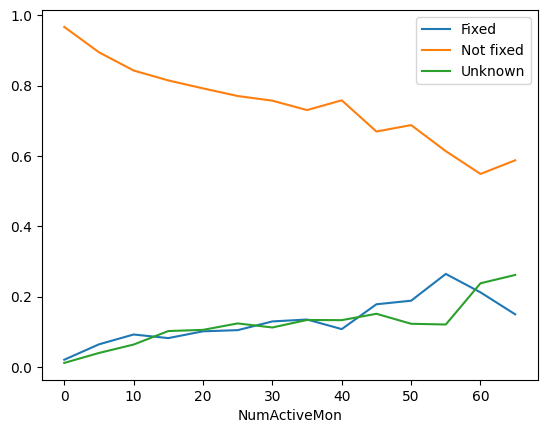

In [128]:
#Interesting: projects that are active for longer are less likely to not modify the vulnerable file

plotByValueIncreasing("NumActiveMon", 5, df, 66, True)

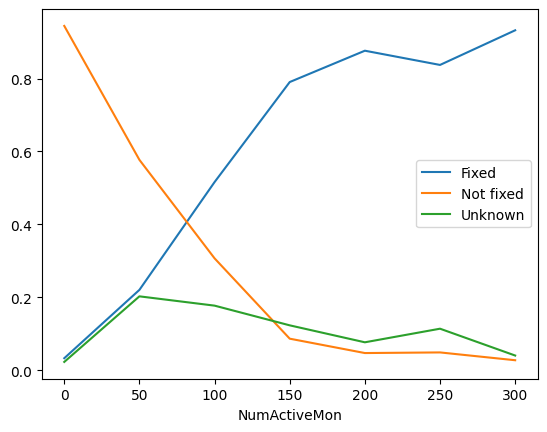

In [131]:
#Interesting bonus: projects that are active for a very long time (for longer than 12 years) are very likely to fix copied vulnerabilities

plotByValueIncreasing("NumActiveMon", 50, df, 300, True)

In [127]:
pd.to_numeric(df[df['CommunitySize'] != " "]['CommunitySize']).quantile(0.99)

31.0

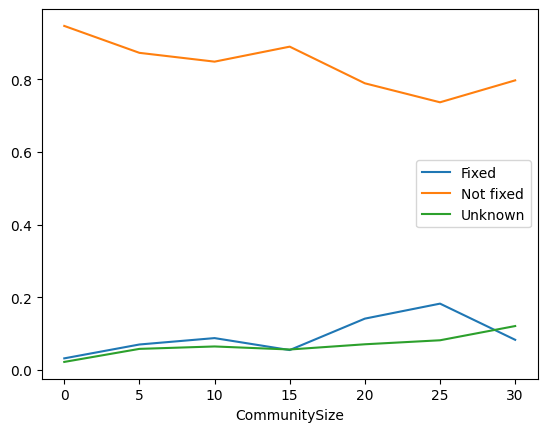

In [132]:
# larger community size means less likely to not change the vulnerable file

plotByValueIncreasing("CommunitySize", 5, df[df["CommunitySize"] != " "], 31, True)

In [133]:
pd.to_numeric(df[df['NumStars'] != " "]['NumStars']).quantile(0.99)

1435.0

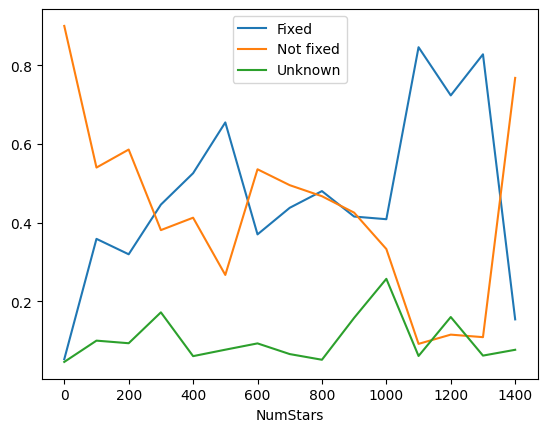

In [137]:
# more stars, more likely to fix the vulnerable copy, but value jumping quite a lot

plotByValueIncreasing("NumStars", 100, df, 1435, False)

In [135]:
pd.to_numeric(df[df['NumForks'] != " "]['NumForks']).quantile(0.99)

29.0

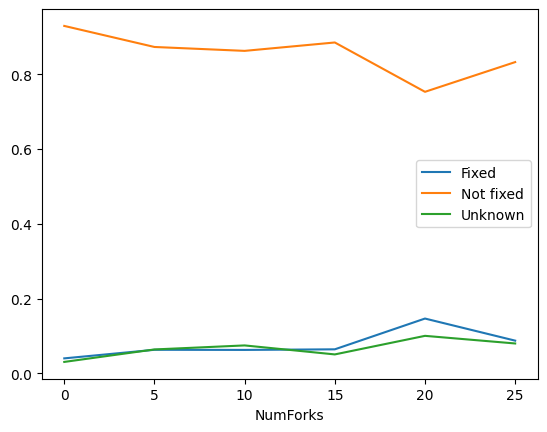

In [139]:
# larger number of forks --> slightly less vulnerabilities not modified

plotByValueIncreasing("NumForks", 5, df[df['NumForks'] != " "], 29, True)

In [140]:
pd.to_numeric(df[df['NumCore'] != " "]['NumCore']).quantile(0.99)

163.0

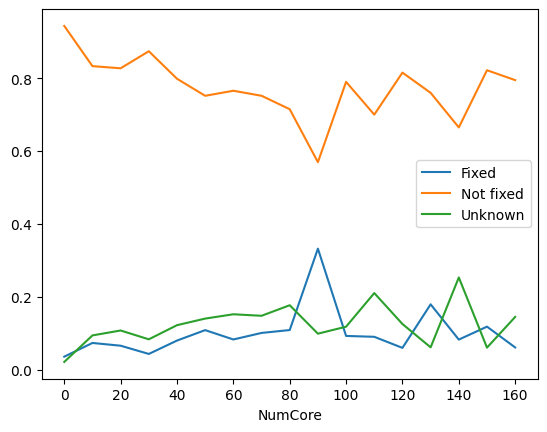

In [141]:
# larger number of core, less vulnerabilities not modified

plotByValueIncreasing("NumCore", 10, df, 163, False)

In [156]:
numeric_df = df[(df['NumCommits'] != " ") & (df['NumCore'] != " ") & (df['NumForks'] != " ") & (df['NumStars'] != " ") ]
numeric_df.NumCommits= pd.to_numeric(numeric_df['NumCommits'])
numeric_df.NumCore= pd.to_numeric(numeric_df['NumCore'])
numeric_df.NumForks= pd.to_numeric(numeric_df['NumForks'])
numeric_df.NumStars= pd.to_numeric(numeric_df['NumStars'])
numeric_df.CommunitySize= pd.to_numeric(numeric_df['CommunitySize'])
numeric_df.NumActiveMon= pd.to_numeric(numeric_df['NumActiveMon'])


/var/folders/6w/7bbpdns15f3_lz9dcrprnwm80000gn/T/ipykernel_1229/79059263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.NumCommits= pd.to_numeric(numeric_df['NumCommits'])
/var/folders/6w/7bbpdns15f3_lz9dcrprnwm80000gn/T/ipykernel_1229/79059263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df.NumCore= pd.to_numeric(numeric_df['NumCore'])
/var/folders/6w/7bbpdns15f3_lz9dcrprnwm80000gn/T/ipykernel_1229/79059263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [160]:
numeric_df.NumCommits.quantile(0.90)

445.0

In [161]:
numeric_df.NumCore.quantile(0.90)

9.0

In [162]:
numeric_df.NumActiveMon.quantile(0.90) 

32.0

In [163]:
numeric_df_big = numeric_df[(numeric_df.NumCommits > 445.0) & (numeric_df.NumCore > 9.0) & (numeric_df.NumActiveMon > 32.0)]

In [168]:
# how many objectr remain in the big object df? 

numeric_df_big[['CVE', 'Project', 'FileInfo']].nunique() 

CVE         1844
Project     1343
FileInfo      16
dtype: int64

In [169]:
# in the big projects df more than half of cloned vulnerabilities are fixed, but still many are not

numeric_df_big.groupby('FileInfo')['status'].value_counts(normalize=True)

FileInfo     status  
 C/C++       notfixed    0.583528
             unknown     0.209433
             fixed       0.207038
 Dart        fixed       0.500000
             unknown     0.500000
 Fortran     fixed       0.800000
             unknown     0.200000
 Go          fixed       0.895238
             unknown     0.066667
             notfixed    0.038095
 Java        fixed       0.694915
             notfixed    0.169492
             unknown     0.135593
 JavaScript  fixed       0.886650
             unknown     0.070529
             notfixed    0.042821
 Kotlin      unknown     1.000000
 Lisp        fixed       1.000000
 Lua         fixed       0.666667
             unknown     0.333333
 PHP         fixed       0.723810
             unknown     0.228571
             notfixed    0.047619
 Perl        fixed       0.666667
             notfixed    0.333333
 Python      fixed       0.800000
             unknown     0.104762
             notfixed    0.095238
 Ruby        fixed       0

## RQ5: How long does it take to fix a cloned vulnerability?

Subquestions: 
- Time distribution overall
- Time distribution for projects with many commits, stars, Security.md file? 

In [85]:
df.columns

Index(['CVE', 'ProjectUrl', 'Project', 'Path', 'status', 'FirstBadBlob',
       'FirstBadTime', 'FirstGoodBlob', 'FirstGoodTime', 'TimeSinceFix',
       'TimeSinceFixF', 'TimeSincePub', 'TimeSincePubF', 'TimeVulnRemained',
       'TimeVulnRemainedF', 'NumAuthors', 'EarliestCommitDate',
       'LatestCommitDate', 'ValidDates', 'NumActiveMon', 'NumStars', 'NumCore',
       'CommunitySize', 'NumCommits', 'NumForks', 'FileInfo', 'GHStars',
       'GHCommits', 'SECURITY.md', 'Corp', 'file_ending', 'source'],
      dtype='object')

In [146]:
pd.to_numeric(df[df.TimeVulnRemained != " "].TimeVulnRemained).describe()

count    103194.000000
mean         -3.800550
std        1397.985265
min      -18631.000000
25%           0.000000
50%           0.000000
75%         114.000000
max        3530.000000
Name: TimeVulnRemained, dtype: float64

In [170]:
# it takes more time to fix vulnerabilities in larger projects? 

pd.to_numeric(numeric_df_big[numeric_df_big.TimeVulnRemained != " "].TimeVulnRemained).describe()

count     8605.000000
mean       298.760256
std        883.358071
min     -18631.000000
25%          2.000000
50%        148.000000
75%        512.000000
max       2642.000000
Name: TimeVulnRemained, dtype: float64